In [1]:
import numpy as np
import matplotlib.pyplot as plt


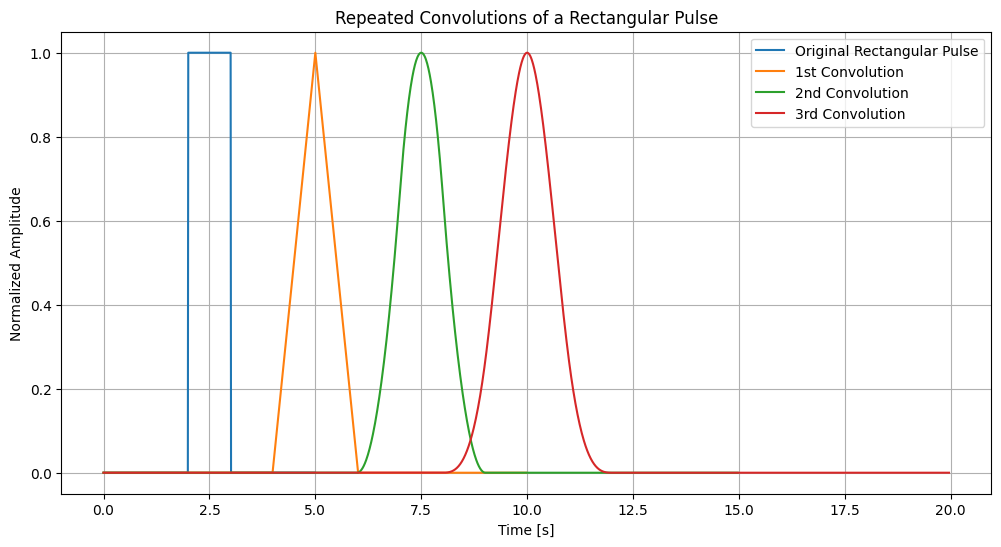

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Generate a rectangular pulse
# ----------------------------
def create_rect_pulse(sampling_rate=100, total_time=5, center=2.5, pulse_width=1.0):
    times = np.arange(0, total_time, 1/sampling_rate)
    pulse = np.where((times >= center - pulse_width/2) & (times <= center + pulse_width/2), 1.0, 0.0)
    return times, pulse

# ----------------------------
# Convolution with normalization
# ----------------------------
def normalize_convolution(signal1, signal2):
    conv_result = np.convolve(signal1, signal2, mode='full')
    conv_result /= np.max(conv_result)
    return conv_result

# ----------------------------
# Parameters and initial pulse
# ----------------------------
fs = 100
time_vec, rect_signal = create_rect_pulse(sampling_rate=fs)

# ----------------------------
# Successive convolutions
# ----------------------------
conv1 = normalize_convolution(rect_signal, rect_signal)
conv2 = normalize_convolution(conv1, rect_signal)
conv3 = normalize_convolution(conv2, rect_signal)

# Time axes for convolved signals
t_conv1 = np.arange(len(conv1)) / fs
t_conv2 = np.arange(len(conv2)) / fs
t_conv3 = np.arange(len(conv3)) / fs

# ----------------------------
# Plotting all results
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(time_vec, rect_signal, label="Original Rectangular Pulse")
plt.plot(t_conv1, conv1, label="1st Convolution")
plt.plot(t_conv2, conv2, label="2nd Convolution")
plt.plot(t_conv3, conv3, label="3rd Convolution")
plt.xlabel("Time [s]")
plt.ylabel("Normalized Amplitude")
plt.title("Repeated Convolutions of a Rectangular Pulse")
plt.grid(True)
plt.legend()
plt.show()


Convolving the rectangular pulse with itself once,
𝑥
∗
𝑥
x∗x, transforms it into a triangular shape.

Performing a second convolution,
(
𝑥
∗
𝑥
)
∗
𝑥
(x∗x)∗x, smooths the edges further, giving a shape similar to a parabolic curve.

After the third convolution,
(
(
𝑥
∗
𝑥
)
∗
𝑥
)
∗
𝑥
((x∗x)∗x)∗x, the signal becomes even rounder and smoother, with sharp edges largely eliminated.

The key observation is that repeated self-convolution progressively smooths a signal.

This phenomenon is closely related to the Central Limit Theorem, as successive convolutions of a function gradually produce a shape approaching a Gaussian distribution.